In [33]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
from utils import *

import ffn
#%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
sundays = []
for d in allsundays(2015):
    sundays.append(d)
for d in allsundays(2016):
    sundays.append(d)
for d in allsundays(2017):
    sundays.append(d)
for d in allsundays(2018):
    sundays.append(d)
    
daily_ts = []
for d in everyday(2015):
    daily_ts.append(d)
for d in everyday(2016):
    daily_ts.append(d)
for d in everyday(2017):
    daily_ts.append(d)
for d in everyday(2018):
    daily_ts.append(d)

In [3]:
daily15 = pd.read_csv('daily_mktcap_2015.csv',index_col='Date', parse_dates=True)
daily16 = pd.read_csv('daily_mktcap_2016.csv',index_col='Date', parse_dates=True)
daily17 = pd.read_csv('daily_mktcap_2017.csv',index_col='Date', parse_dates=True)
daily18 = pd.read_csv('daily_mktcap_2018.csv',index_col='Date', parse_dates=True)
daily15.MktCap = daily15.MktCap.str.replace('?','')
daily16.MktCap = daily16.MktCap.str.replace('?','')
daily17.MktCap = daily17.MktCap.str.replace('?','')
daily18.MktCap = daily18.MktCap.str.replace('?','')

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
daily = daily15.append(daily16, sort=False)
daily = daily.append(daily17, sort=False)
daily = daily.append(daily18, sort=False)

In [8]:
df_multi = daily[:]
df_multi.reset_index(inplace=True)
df_multi = df_multi[df_multi.MktCap != '']
df_multi = df_multi[df_multi.MktCap != ' ']
#df_multi.drop(df_multi[df_multi.MktCap.astype(float) < 5000000000].index, inplace=True)
df_multi = df_multi.dropna()

In [9]:
df_multi.set_index(['Symbol', 'Date'], inplace=True)

In [10]:
weighted_df = weight_df(daily, df_multi, sundays, daily_ts)

In [11]:
master_df = {}

for pct in range(5, 25, 5):
    s = sum(weighted_df.sort_values(by=[sundays[1]], ascending=False).dropna(subset=[sundays[1]]).iloc[:,1][0:pct])
    i_divisor = s / 100
    values = []
    dates = []
    for n in range(len(sundays)):
        value = sum(weighted_df.sort_values(by=[sundays[n]], ascending=False).dropna(subset=[sundays[n]]).iloc[:,n][0:pct]) / i_divisor
        values.append(value)
        dates.append(sundays[n])
    master_df[pct] = values

In [12]:
df = pd.DataFrame(master_df, dates)

In [13]:
df_log = np.log10(df)
df_norm = df.apply(lambda x: x / x[0])

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 'Price of Index'), Text(0.5, 0, 'Year')]

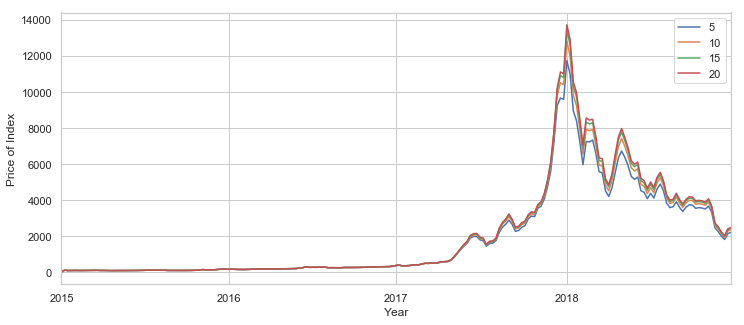

In [19]:
plot_df_avg = df.plot(legend=True,figsize=(12,5))
plot_df_avg.set(xlabel='Year', ylabel='Price of Index')

In [20]:
plot_df_avg.figure.savefig("avg_df.png")

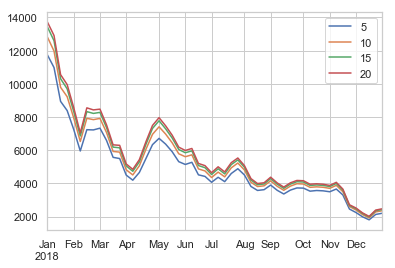

In [21]:
df['2018':].plot.line()

In [22]:
mktcap_comp = {}

daily = daily[daily.MktCap != '']
daily = daily[daily.MktCap != ' ']
total_mktcap = sum(daily.loc[sundays[-1]].MktCap.astype(float))

for pct in range(5, 45, 5):
    mktcap_comp[pct] = round(100 / total_mktcap * sum(weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:pct]),2)
    
mktcap_comp['alle'] = 100
mktcap_comp = pd.DataFrame.from_dict(mktcap_comp, orient='index')
mktcap_comp = mktcap_comp.reset_index()
mktcap_comp.columns = ['Anzahl Währungen im Index', 'Prozent am ganzen Markt']

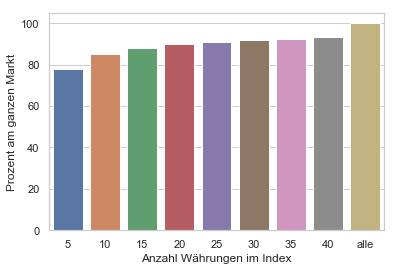

In [23]:
mktcap_comp_plot = sns.barplot(data=mktcap_comp, y='Prozent am ganzen Markt', x='Anzahl Währungen im Index')

In [24]:
mktcap_comp_plot.figure.savefig("avg_mkt_cap.png")

In [25]:
stats = df[1:].calc_stats()
stats.display()

Stat                 5           10          15          20
-------------------  ----------  ----------  ----------  ----------
Start                2015-01-11  2015-01-11  2015-01-11  2015-01-11
End                  2018-12-30  2018-12-30  2018-12-30  2018-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         2098.79%    2250.56%    2325.70%    2367.91%
Daily Sharpe         3.29        3.32        3.34        3.35
Daily Sortino        6.35        6.46        6.51        6.53
CAGR                 117.93%     121.63%     123.40%     124.37%
Max Drawdown         -84.64%     -85.02%     -85.28%     -85.35%
Calmar Ratio         1.39        1.43        1.45        1.46

MTD                  -10.33%     -9.71%      -9.20%      -9.00%
3m                   -40.96%     -40.92%     -40.81%     -40.89%
6m                   -50.24%     -50.50%     -50.93%     -51.30%
YTD                  -77.04%     -77.38%     -77.51%     -77.57%
1Y                   -77.23%  

In [26]:
weighted_df.sort_values(by=[sundays[-1]], ascending=False).dropna(subset=[sundays[-1]]).iloc[:,-1][0:5]

BTC    6.733925e+10
XRP    1.527571e+10
ETH    1.388375e+10
BCH    2.959503e+09
EOS    2.355338e+09
Name: 2018-12-30 00:00:00, dtype: float64

In [27]:
btc = pd.DataFrame(df_multi.loc['BTC'].Price.astype('float'))
xrp = pd.DataFrame(df_multi.loc['XRP'].Price.astype('float'))
eth = pd.DataFrame(df_multi.loc['ETH'].Price.astype('float'))
bch = pd.DataFrame(df_multi.loc['BCH'].Price.astype('float'))
eos = pd.DataFrame(df_multi.loc['EOS'].Price.astype('float'))

In [28]:
result = pd.concat([df[5], btc, xrp, eth, bch, eos], axis=1, sort=False)
result.columns= ['Kryptoindex', 'BTC', 'XRP', 'ETH', 'BCH', 'EOS']
result = result.ffill(axis = 0)

In [29]:
fin_res = result['2017-08-01':]
fin_res = fin_res.pct_change()
#fin_res = np.exp(np.log1p(fin_res).cumsum())
#fin_res = np.exp(np.log1p(fin_res).cumsum())
fin_res = (1 + fin_res).cumprod()

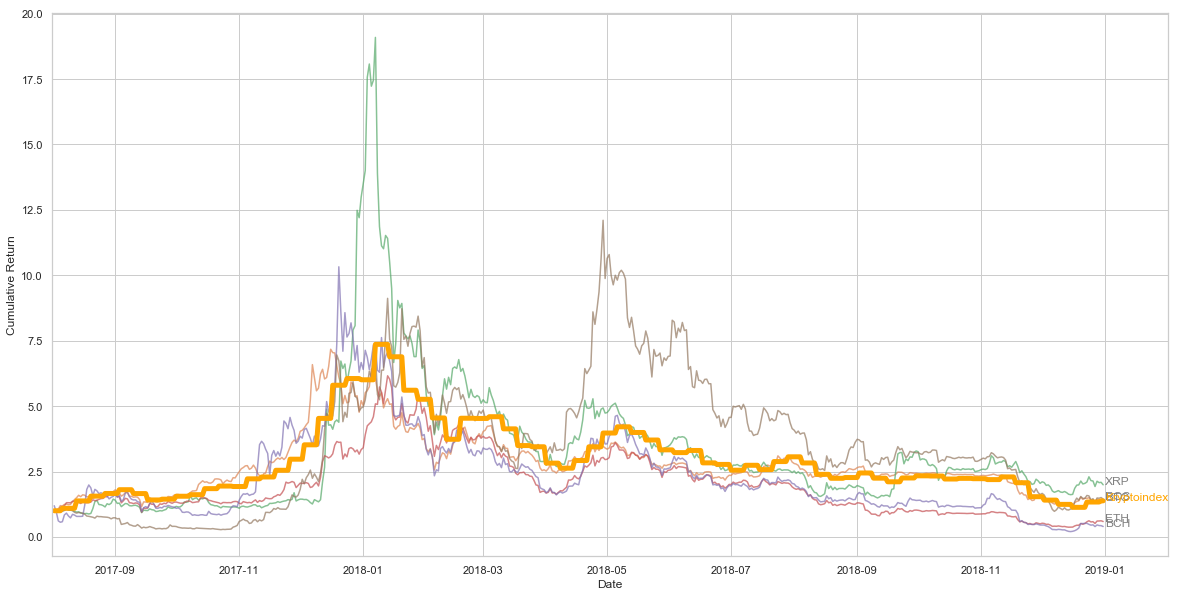

In [36]:
plt.figure(figsize=(20,10))

for column in fin_res:
    plt.plot(fin_res[column], marker='', alpha=0.7)
    
plt.plot(fin_res['Kryptoindex'], marker='', color='orange', linewidth=5)

plt.xlim('2017-08-01','2019-02')

num=0
for i in fin_res.tail(1).values[0][1:]:
    num+=1
    name=list(fin_res)[num]
    if name != 'Kryptoindex':
        plt.text('2019', i, name, horizontalalignment='left', size='large', color='grey')
        
plt.text('2019', fin_res.Kryptoindex.tail(1), 'Kryptoindex', horizontalalignment='left', size='large', color='orange')
 
plt.xlabel("Date")
plt.ylabel('Cumulative Return')

fig1 = plt.gcf()
fig1.savefig("plot_comparison_avg.png", dpi=100)

[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Date')]

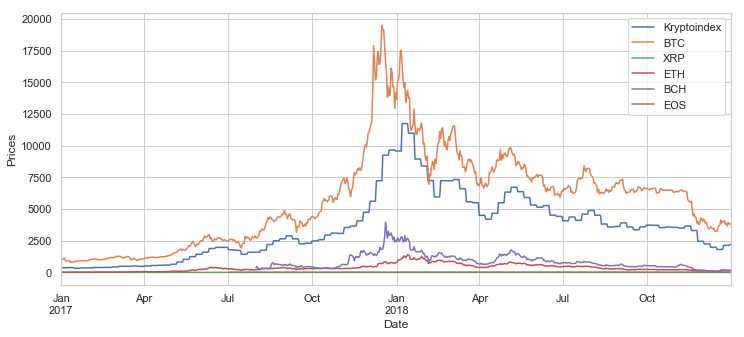

In [113]:
plot_comparison = result['2017':].plot(legend=True,figsize=(12,5))
plot_comparison.set(xlabel='Date', ylabel='Prices')

In [114]:
plot_comparison.figure.savefig("avg_plot_comparison.png")

In [115]:
stats = result.calc_stats()
stats.display()

Stat                 Kryptoindex    BTC         XRP         ETH         BCH         EOS
-------------------  -------------  ----------  ----------  ----------  ----------  ----------
Start                2017-08-01     2017-08-01  2017-08-01  2017-08-01  2017-08-01  2017-08-01
End                  2018-12-31     2018-12-31  2018-12-31  2018-12-31  2018-12-31  2018-12-31
Risk-free rate       0.00%          0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         37.87%         37.69%      99.21%      -41.19%     -60.25%     44.38%
Daily Sharpe         0.57           0.58        0.84        0.17        0.43        0.79
Daily Sortino        0.94           0.99        1.94        0.28        0.87        1.58
CAGR                 25.47%         25.35%      62.73%      -31.27%     -47.89%     29.63%
Max Drawdown         -84.64%        -83.40%     -92.20%     -93.96%     -98.03%     -91.92%
Calmar Ratio         0.30           0.30        0.68        -0.33       -0.49       

In [54]:
norm = pd.read_csv('norm_for_comp.csv',index_col='Date', parse_dates=True)

In [55]:
norm.head()

,Kryptoindex,BTC,XRP,ETH,BCH,EOS
Date,,,,,,
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,1.0,0.997208,0.977747,0.969925,1.191179,1.000000
2017-08-03,1.0,1.031811,0.986213,0.993694,0.958001,1.011236
2017-08-04,1.0,1.065347,0.981305,0.983684,0.613273,1.016854
2017-08-05,1.0,1.196688,1.043399,1.131146,0.560906,1.073034


[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Date')]

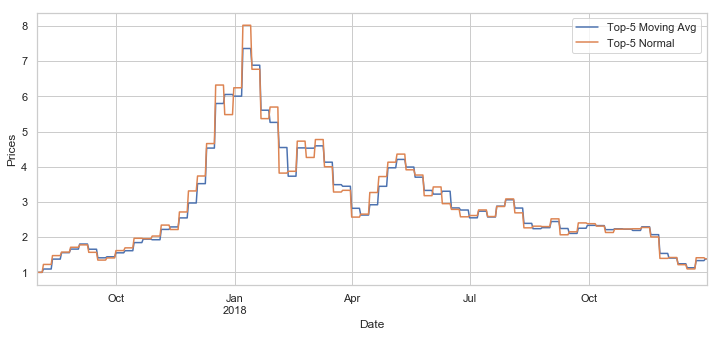

In [64]:
final_comp = fin_res['Kryptoindex'].plot(figsize=(12,5), label='Top-5 Moving Avg', legend=True)
final_comp = norm['Kryptoindex'].plot(label='Top-5 Normal', legend=True)
final_comp.set(xlabel='Date', ylabel='Prices')

In [65]:
final_comp.figure.savefig("Index_Index_comp.png")

In [66]:
more_stats = result['2017-08-01':]
more_stats = more_stats.pct_change()

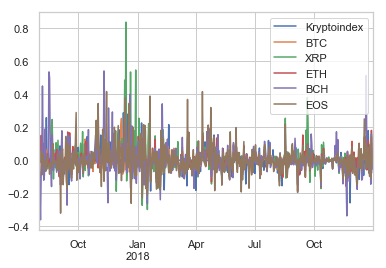

In [70]:
more_stats.plot()

In [72]:
np.std(more_stats.Kryptoindex)

0.04468089051679745

In [73]:
np.mean(more_stats.Kryptoindex)

0.0015957098529054113